<h1 style="background-color:#d9ead3; padding:10px; text-align:center;">STUDENT PERFORMANCE DATASET</h1>


<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;">
    Il dataset "Student Performance" si distingue per la sua ricchezza di informazioni, offrendo una panoramica dettagliata sui diversi fattori che influenzano l'apprendimento e i risultati accademici degli studenti. Dai dati demografici, come età e sesso, alle informazioni più specifiche su abitudini di studio e supporto familiare, questo insieme di dati permette una comprensione multidimensionale delle dinamiche scolastiche. Attraverso l'analisi di tali variabili, ricercatori ed educatori possono identificare tendenze significative, determinare l'impatto di vari fattori esterni e interni sul rendimento scolastico, e sviluppare strategie mirate per migliorare l'efficacia dell'insegnamento e dell'apprendimento.
</p>


<p style="background-color:#e8f5e3; padding:15px; border-radius:5px; line-height:1.6;">
    Con il codice qui sotto, vedremo come un processo di machine learning per prevedere il punteggio in matematica degli studenti basandosi sulla loro etnia, utilizza il metodo di Linear Regression.
    Dopo aver caricato il dataset (file csv) da cui si prendono le informazioni, trasformando la colonna etnica da testuale a numerica, divide i dati in un set per l'addestramento del modello e un altro per testarlo. Ed è qui che il modello di regressione lineare viene poi addestrato su questi dati.
    Infine, il codice chiede all'utente di inserire un gruppo etnico e usa il modello per prevedere il punteggio medio in matematica per quel gruppo, stampando il risultato.
</p>


In [12]:
#Si importano qui le varie librerie necessarie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# dataset caricato
df = pd.read_csv("C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv")

# Converte la colonna "race/ethnicity" da testo a numeri per poterla usare nel modello.
le = LabelEncoder()
df["race/ethnicity"] = le.fit_transform(df["race/ethnicity"])

# Suddivide i dati in caratteristiche (X) e target (y)
X = df[["race/ethnicity"]]
y = df["math score"]

# Suddivide i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza e addestra il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Prevede il punteggio di matematica per un gruppo specifico
group_name = input("Inserisci il nome del gruppo di cui vuoi predirre il voto in matematica: ")
group_encoded = le.transform([group_name])
predicted_score = model.predict([group_encoded])

print(f"Il punteggio di matematica previsto per il gruppo {group_name} è {predicted_score[0]}")

Inserisci il nome del gruppo di cui vuoi predirre il voto in matematica: group A
Il punteggio di matematica previsto per il gruppo group A è 60.728626347231206


C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h2 style="color:#c2e2ff; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> LA GESTIONE DEI MISSING VALUES </h2>

<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
    I "missing values", o valori mancanti, si riferiscono a dati che sono assenti in un dataset. Questa assenza può derivare da vari motivi, come errori nella raccolta dei dati, perdita di informazioni o mancata risposta a determinate domande in un sondaggio. La gestione di questi valori mancanti è cruciale nell'analisi dei dati per diverse ragioni come ad esempio il fatto che siano capaci di influenzare radicalmente le conclusioni del dataset.

</p>


<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
    Perciò il codice sotto verifica la presenza di valori mancanti (missing values) del nostro file CSV e comunica i risultati. In questo caso nel dataset non erano presenti missing values e perciò viene proprio stampata con ''Print'' la loro non presenza. Ad ogni modo questo processo è cruciale all'inizio dell'analisi dei dati perché se son presenti missing values, possono influenzare significativamente le conclusioni dell'analisi.
</p>


In [6]:
import pandas as pd

# Caricare i dati dal file CSV specificato
data_check_missing = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Controllare per missing values
missing_values_check = data_check_missing.isnull().sum()

# Verificare se ci sono missing values nel dataset
missing_values_present = missing_values_check.any()

# Risultato del controllo
if missing_values_present:
    missing_message = "Ci sono missing values nel dataset."
else:
    missing_message = "Non ci sono missing values nel dataset."

print(missing_message)
print(missing_values_check)


Non ci sono missing values nel dataset.
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
   Qui si calcolano le percentuali di valori mancanti e non mancanti. Successivamente, visualizza queste informazioni attraverso un grafico a torta colorato e facilmente interpretabile, con una sezione "explode" per dare risalto ai valori non mancanti. L'obiettivo è fornire un'illustrazione visiva della qualità dei dati analizzando la presenza di valori mancanti nel dataset. 
</p>





<p style="background-color:#c2e2ff; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
   TRA L'ALTRO In Python, "explode" è un termine comunemente associato ai DataFrame della libreria pandas. Questo metodo è utilizzato per trasformare ogni elemento di una lista presente in una riga di un DataFrame in righe separate, mantenendo il valore di tutte le altre colonne invariate. Di fatto, "explode" permette di "espandere" una lista contenuta in una singola cella di un DataFrame in multiple righe, rendendo ogni elemento della lista il valore di una nuova riga.
</p>





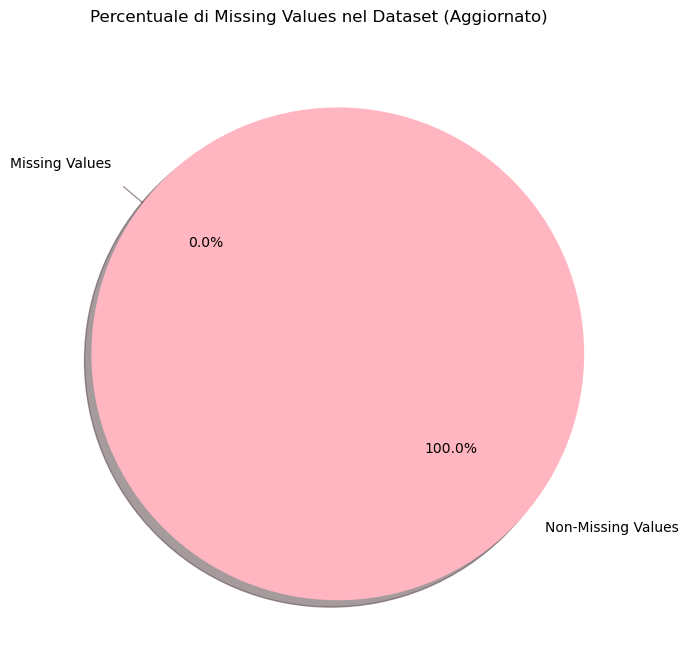

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ricarica i dati dal file CSV
data_reload = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Calcola nuovamente le percentuali di missing values
missing_values_counts_reload = data_reload.isnull().sum()
total_cells_reload = np.product(data_reload.shape)
total_missing_reload = missing_values_counts_reload.sum()
percent_missing_reload = (total_missing_reload / total_cells_reload) * 100
percent_not_missing_reload = 100 - percent_missing_reload

# Dati per il grafico a torta aggiorato
labels_reload = ['Non-Missing Values', 'Missing Values']
sizes_reload = [percent_not_missing_reload, percent_missing_reload]
colors_reload = ['lightpink', 'lightcoral']
explode_reload = (0.1, 0)  # esplode la prima fetta

# Crea grafico a torta aggiornato
plt.figure(figsize=(8, 8))
plt.pie(sizes_reload, explode=explode_reload, labels=labels_reload, colors=colors_reload, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentuale di Missing Values nel Dataset (Aggiornato)')
plt.show()



<h2 style="color:#d9d2e9; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> GLI OUTLIERS </h2>


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
   Gli outlier sono valori anomali che si distaccano notevolmente dalla normale distribuzione dei dati. Questi valori "fuori scala" possono influenzare drasticamente le previsioni di un modello statistico e vengono gestiti proprio per questo.
che siano capaci di influenzare radicalmente le conclusioni del dataset.

</p>


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
 L'obbiettivo principale del codice qui sotto calcolare la media e la deviazione standard dei voti in queste materie, definire un criterio per identificare gli outliers (in questo caso quindi punteggi anomali) basato su due deviazioni standard dalla media, e infine contare quanti studenti hanno voti considerati outliers in ciascuna materia.
</p>

In [9]:
import pandas as pd

# Carica il dataset
data = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Calcola la media e la deviazione standard per le colonne dei voti
means = data[['math score', 'reading score', 'writing score']].mean()
stds = data[['math score', 'reading score', 'writing score']].std()

# Definisce il limite per gli outliers come 2 deviazioni standard dalla media
limits = 2 * stds

# Identifica gli outliers
outliers_math = data[(data['math score'] < means['math score'] - limits['math score']) | 
                     (data['math score'] > means['math score'] + limits['math score'])]
outliers_reading = data[(data['reading score'] < means['reading score'] - limits['reading score']) | 
                        (data['reading score'] > means['reading score'] + limits['reading score'])]
outliers_writing = data[(data['writing score'] < means['writing score'] - limits['writing score']) | 
                        (data['writing score'] > means['writing score'] + limits['writing score'])]

# Stampa il numero di outliers per ciascuna materia
print(f"Math Outliers: {outliers_math.shape[0]}")
print(f"Reading Outliers: {outliers_reading.shape[0]}")
print(f"Writing Outliers: {outliers_writing.shape[0]}")


Math Outliers: 46
Reading Outliers: 46
Writing Outliers: 42


<p style="background-color:#d9d2e9; color:#000000; padding:15px; border-radius:5px; line-height:1.6;">
 Il focus qui invece è identificare e visualizzare la percentuale di outliers (valori anomali) nei voti degli studenti in matematica, lettura e scrittura. Questi outliers sono definiti come i voti che si trovano al di fuori di due deviazioni standard dalla media. 
 
</p>

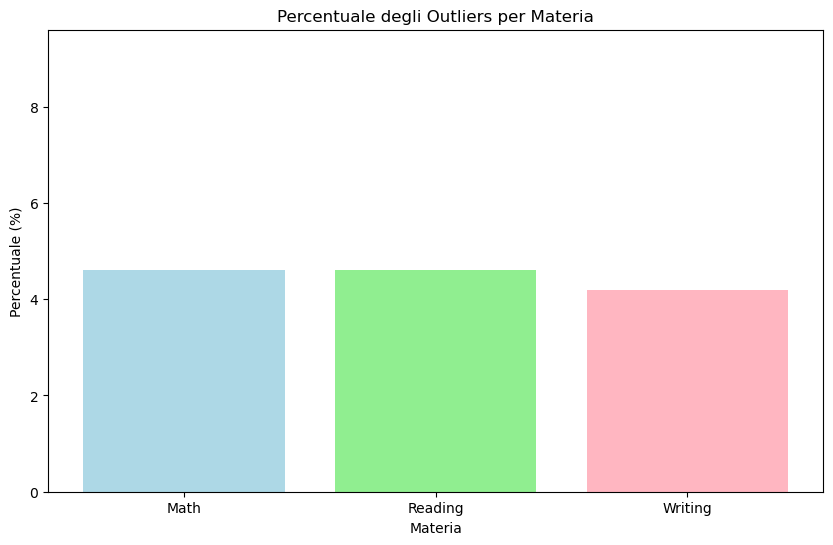

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricare il dataset
data = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Calcolare la media e la deviazione standard per le colonne dei voti
means = data[['math score', 'reading score', 'writing score']].mean()
stds = data[['math score', 'reading score', 'writing score']].std()

# Definire il limite per gli outliers come 2 deviazioni standard dalla media
limits = 2 * stds

# Identificare gli outliers come booleani
outliers_math_bool = (data['math score'] < means['math score'] - limits['math score']) | \
                     (data['math score'] > means['math score'] + limits['math score'])

outliers_reading_bool = (data['reading score'] < means['reading score'] - limits['reading score']) | \
                        (data['reading score'] > means['reading score'] + limits['reading score'])

outliers_writing_bool = (data['writing score'] < means['writing score'] - limits['writing score']) | \
                        (data['writing score'] > means['writing score'] + limits['writing score'])

# Calcolare le percentuali degli outliers
percentages = {
    'Math': outliers_math_bool.mean() * 100,
    'Reading': outliers_reading_bool.mean() * 100,
    'Writing': outliers_writing_bool.mean() * 100
}

# Creare un grafico a barre per mostrare le percentuali
plt.figure(figsize=(10, 6))
plt.bar(percentages.keys(), percentages.values(), color=['lightblue', 'lightgreen', 'lightpink'])
plt.title('Percentuale degli Outliers per Materia')
plt.ylabel('Percentuale (%)')
plt.xlabel('Materia')
plt.ylim(0, max(percentages.values()) + 5)  # Aggiunge spazio sopra la barra più alta
plt.show()


<h2 style="color:#fce5cd; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> LO SCALING </h2>




<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Lo scaling è una tecnica usata in data science per regolare la scala dei dati numerici. Questo processo è importante perché i modelli di machine learning lavorano meglio quando i dati su cui sono addestrati hanno scale simili. In pratica, lo scaling può trasformare i punteggi degli esami o i redditi (che possono variare in un ampio intervallo) in valori che sono più facilmente confrontabili e gestibili per un modello. Ci sono diversi metodi di scaling, come lo Standard Scaling, che riduce i dati a una media di zero e una deviazione standard di uno, rendendo così i dati più omogenei e facilitando l'apprendimento del modello.
</p>

<h3 style="color:#f9cb9c; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> METODO MIN MAX SCALER </h3>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Il Min-Max Scaler è una tecnica di normalizzazione dei dati che riscala i valori in un intervallo definito, tipicamente tra 0 e 1. Funziona riducendo la distanza tra i valori massimi e minimi dei dati. Questo approccio è utile perché mantiene la struttura dei dati originali mentre assicura che tutti i valori abbiano lo stesso peso per i modelli di machine learning, migliorando la loro performance e facilità di addestramento. È particolarmente vantaggioso quando si lavora con algoritmi sensibili alle variazioni di scala tra le caratteristiche dei dati.
</p>

<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
 In questo codice qui sotto si utilizzano le librerie pandas, NumPy e scikit-learn per normalizzare i dati numerici di un dataset contenuto nel nostro file CSV, specificamente i voti degli studenti. Lo scopo è scalare i valori numerici all'interno di un intervallo compreso tra 0 e 1, con il MinMaxScaler.

</p>

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Caricare i dati dal file CSV
data_to_scale = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Selezionare solo le colonne numeriche da scalare
numeric_cols = data_to_scale.select_dtypes(include=[np.number]).columns

# Inizializzare il MinMaxScaler
scaler = MinMaxScaler()

# Applicare lo scaling alle colonne numeriche
data_to_scale[numeric_cols] = scaler.fit_transform(data_to_scale[numeric_cols])

# Visualizzare le prime righe dei dati scalati
print(data_to_scale.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        0.72       0.662651       0.711111  
1               completed        0.69       0.879518       0.866667  
2                    none        0.90       0.939759       0.922222  
3                    none        0.47       0.481928       0.377778  
4                    none        0.76       0.734940       0.722222  


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
 DOPO l'applicazione del Min-Max scaler questo grafico fornisce una visualizzazione dell'effetto dell'applicazione del MinMaxScaler sui punteggi di matematica di uno studente, utilizzando un istogramma con una curva di densità (KDE, Kernel Density Estimate) per una rappresentazione più fluida della distribuzione. Di seguito è dettagliato il procedimento:
</p>

<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
 Nel codice, il KDE (Kernel Density Estimate) è stato utilizzato per aggiungere una curva di stima della densità al grafico dell'istogramma dei punteggi di matematica dopo l'applicazione del MinMax Scaling. Il KDE è una tecnica di visualizzazione dei dati che mira a stimare la distribuzione di probabilità sottostante un set di dati.
</p>

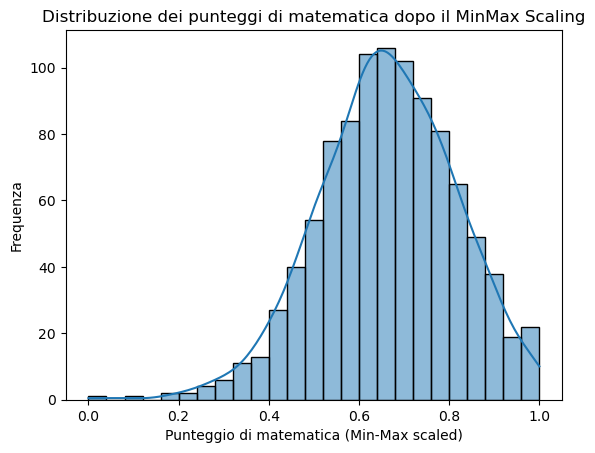

In [7]:
# Utilizziamo il DataFrame 'data_to_scale' dopo aver applicato il MinMaxScaler per mostrare l'effetto dello scaling su 'math score'.
import seaborn as sns
import matplotlib.pyplot as plt
# Creare un istogramma dei dati scalati per 'math score'
sns.histplot(data_to_scale['math score'], kde=True)
plt.title('Distribuzione dei punteggi di matematica dopo il MinMax Scaling')
plt.xlabel('Punteggio di matematica (Min-Max scaled)')
plt.ylabel('Frequenza')
plt.show()


<h3 style="color:#f6b26b; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> METODO STANDART SCALING </h3>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Lo Standard Scaling è una tecnica di preprocessing dei dati che regola la distribuzione dei valori di ogni caratteristica in modo che abbiano una media (μ) pari a 0 e una deviazione standard (σ) pari a 1. Questo metodo è anche conosciuto come "Z-score normalization". L'idea è di trasformare i dati in modo che si allineino con la distribuzione standard, facilitando la gestione da parte dei modelli di machine learning. Lo Standard Scaling è particolarmente utile quando i dati presentano caratteristiche con scale diverse e si vuole garantire che queste influenzino il modello in modo equilibrato, migliorando così la convergenza durante l'addestramento.
</p>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
  Il codice qui sotto è strutturato per normalizzare i dati numerici del nostro dataset degli Students Performance utilizzando la tecnica dello Standard Scaling. Questo metodo di normalizzazione modifica i dati in modo che abbiano media zero e deviazione standard unitaria. 

</p>

In [8]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Caricare i dati dal file CSV
data_to_standard_scale = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Selezionare solo le colonne numeriche per lo scaling
numeric_columns = data_to_standard_scale.select_dtypes(include=[np.number]).columns

# Inizializzare lo StandardScaler
standard_scaler = StandardScaler()

# Applicare lo StandardScaler alle colonne numeriche
data_to_standard_scale[numeric_columns] = standard_scaler.fit_transform(data_to_standard_scale[numeric_columns])

# Visualizzare le prime righe dei dati scalati
print(data_to_standard_scale.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none    0.390024       0.193999       0.391492  
1               completed    0.192076       1.427476       1.313269  
2                    none    1.577711       1.770109       1.642475  
3                    none   -1.259543      -0.833899      -1.583744  
4                    none    0.653954       0.605158       0.457333  



<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
 Dopo aver applicato lo Standard Scaling al dataset delle prestazioni degli studenti, il codice qui sotto utilizza le librerie seaborn e matplotlib per visualizzare la distribuzione dei punteggi di matematica normalizzati.

</p>

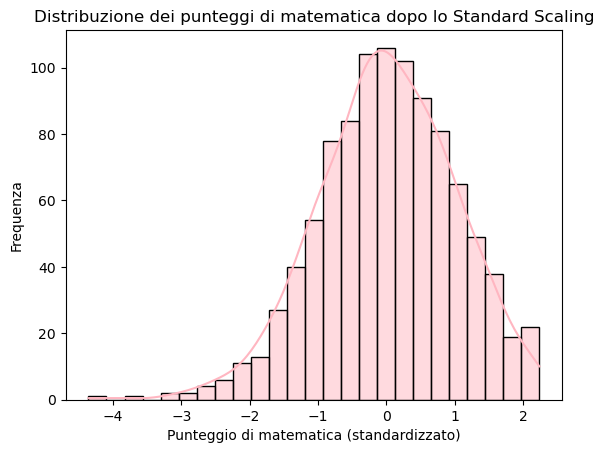

In [9]:
#dopo aver applicato standart scaling!
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Caricare i dati dal file CSV
data = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Selezionare le colonne numeriche per lo scaling
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Inizializzare lo StandardScaler
scaler = StandardScaler()

# Applicare lo StandardScaler alle colonne numeriche
data_scaled = scaler.fit_transform(data[numeric_columns])

# Creare un DataFrame con i dati scalati per facilitare la visualizzazione
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_columns)

# Creare un istogramma dei dati scalati per 'math score'
sns.histplot(data_scaled_df['math score'], kde=True, color='lightpink')
plt.title('Distribuzione dei punteggi di matematica dopo lo Standard Scaling')
plt.xlabel('Punteggio di matematica (standardizzato)')
plt.ylabel('Frequenza')
plt.show()


<h3 style="color:#f1c232; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> METODO ONE HOT ENCODING </h3>


<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
L'One-Hot Encoding è una tecnica usata per convertire variabili categoriche in un formato numerico che i modelli di machine learning possono gestire più facilmente. Trasforma ogni categoria in una nuova colonna binaria (0 o 1), dove ciascuna rappresenta la presenza o l'assenza di quella categoria. Questo metodo è utile per trattare dati non numerici, assicurando che il modello non interpreti erroneamente i dati categorici come ordinati o gerarchici. L'One-Hot Encoding migliora l'interpretazione dei dati categorici da parte dei modelli, facilitando l'addestramento e migliorando le performance.
</p>




<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
Qui si dimostra come applicare questo metodo a colonne categoriche del nostro dataset utilizzando pandas e scikit-learn in Python. 
</p>


In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Caricare i dati dal file CSV
data_for_ohe = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Selezionare le colonne categoriche per l'encoding
categorical_columns = data_for_ohe.select_dtypes(include=[object]).columns

# Inizializzare l'OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Applicare l'OneHotEncoder alle colonne categoriche e creare un DataFrame con i risultati
encoded_data = encoder.fit_transform(data_for_ohe[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenare i nuovi dati codificati con le colonne numeriche originali del dataset
final_df = pd.concat([data_for_ohe.drop(categorical_columns, axis=1), encoded_df], axis=1)

print(final_df.head())


   math score  reading score  writing score  gender_male  \
0          72             72             74          0.0   
1          69             90             88          0.0   
2          90             95             93          0.0   
3          47             57             44          1.0   
4          76             78             75          1.0   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                     1.0                     0.0                     0.0   
1                     0.0                     1.0                     0.0   
2                     1.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     1.0                     0.0   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                     0.0                                            1.0   
1                     0.

C:\Users\esthe\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



<p style="background-color:#fce5cd; padding:15px; border-radius:5px; line-height:1.6;">
 Qui invece si illustra come visualizzare l'impatto dell'encoding one-hot della variabile categorica "genere" sui punteggi di matematica degli studenti, utilizzando un boxplot.
 
</p>


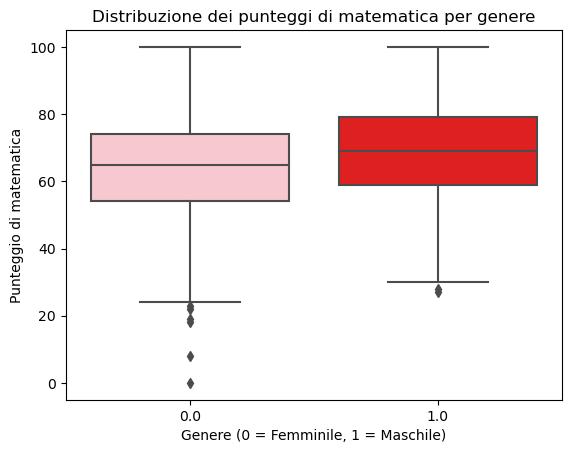

In [11]:
#DOPO AVER APPLICATO ONEHOT

import seaborn as sns
import matplotlib.pyplot as plt

# Dato che abbiamo già creato le variabili one-hot encoded, possiamo visualizzare il loro effetto su una variabile numerica.
# Scegliamo di visualizzare l'effetto dell'encoding della variabile 'gender' sul 'math score'.
# Dato che abbiamo solo due generi e abbiamo eliminato la prima colonna, 'gender_male' rappresenta tutti i generi.

# Dopo aver applicato l'encoding one-hot, aggiungiamo 'math score' a 'encoded_df' per la visualizzazione.
encoded_df['math score'] = data_for_ohe['math score']

# Creiamo un boxplot per mostrare la distribuzione dei punteggi di matematica in base al genere.
# Utilizziamo una palette di colori personalizzata per distinguere i generi.
sns.boxplot(x='gender_male', y='math score', data=encoded_df,
            palette=['pink', 'red'])  # Rosa per il genere femminile (0), Rosso per il maschile (1)
plt.title('Distribuzione dei punteggi di matematica per genere')
plt.xlabel('Genere (0 = Femminile, 1 = Maschile)')
plt.ylabel('Punteggio di matematica')
plt.show()


<h2 style="color:#a2c4c9; padding:10px; text-align:center; text-shadow: 1px 1px 1px #000000; "> LO SPLITTING DATASET </h2>

<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
Il dataset splitting è il processo di suddivisione di un dataset in due o più subset distinti, solitamente denominati set di training e set di test. Questa pratica è comunemente utilizzata nell'apprendimento automatico e nella modellazione statistica per valutare le prestazioni di un modello. 

</p>



<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
Utilizzando la libreria scikit-learn per preparare i dati per l'addestramento e la validazione di un modello di machine learning, questo codice mostra come dividere il nostro dataset di prestazioni degli studenti in un training set e un test set.
</p>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carica i dati dal file CSV (come sempre)
data_for_splitting = pd.read_csv('C:\\Users\\esthe\\Downloads\\StudentsPerformance.csv')

# Utilizza le colonne dei voti come features (X) e 'gender' come target (y)
X = data_for_splitting[['math score', 'reading score', 'writing score']]
y = data_for_splitting['gender']

# Splitting del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensioni dei set
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (800, 3) (800,)
Test set: (200, 3) (200,)


<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
L'obiettivo di questo grafico è di confermare che lo splitting dei dati ha mantenuto una distribuzione uniforme dei punteggi di matematica tra il training set e il test set, assicurando che entrambi contengano una varietà rappresentativa di punteggi. E' molto importante per l'affidabilità dei risultati dell'addestramento e della valutazione del modello.
</p>

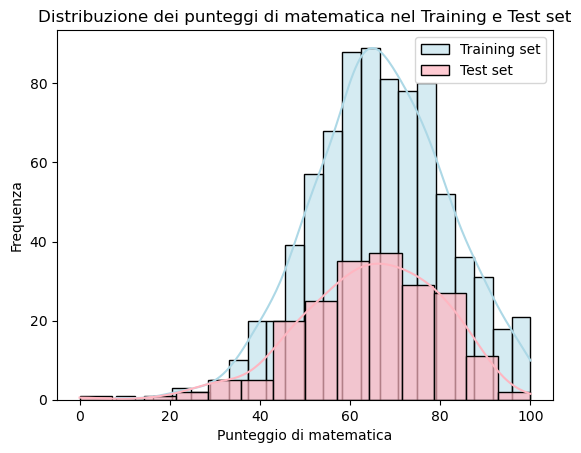

In [15]:
# Per creare i grafici, mostriamo la distribuzione dei punteggi di matematica nel training e nel test set.
# Questo ci aiuterà a vedere se lo splitting ha mantenuto una distribuzione simile tra i due set.
import seaborn as sns
import matplotlib.pyplot as plt
# Grafico per il training set
sns.histplot(X_train['math score'], kde=True, color='lightblue', label='Training set')
# Grafico per il test set
sns.histplot(X_test['math score'], kde=True, color='lightpink', label='Test set', alpha=0.7)
plt.title('Distribuzione dei punteggi di matematica nel Training e Test set')
plt.xlabel('Punteggio di matematica')
plt.ylabel('Frequenza')
plt.legend()
plt.show()


<p style="background-color:#a2c4c9; padding:15px; border-radius:5px; line-height:1.6;">
Questo codice invece dimostra come dividere ulteriormente il training set in un subset di addestramento e un subset di validazione, e poi visualizza la distribuzione dei punteggi di matematica tra questi subset e il test set originale. Il compito di questo codice è garantire che ogni subset rappresenti adeguatamente l'intero dataset in termini di distribuzione dei punteggi di matematica.
</p>

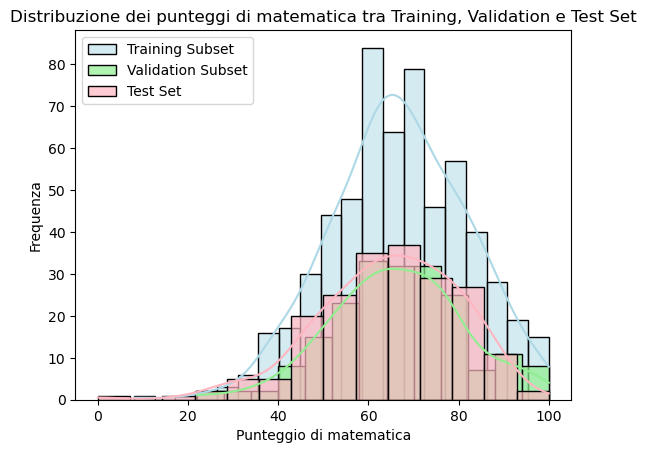

In [16]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Suddividere ulteriormente il training set in un subset di addestramento e un subset di validazione
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Grafico che mostra la distribuzione dei punteggi di matematica tra i vari subset
sns.histplot(X_train_sub['math score'], kde=True, color='lightblue', label='Training Subset')
sns.histplot(X_val_sub['math score'], kde=True, color='lightgreen', label='Validation Subset', alpha=0.7)
sns.histplot(X_test['math score'], kde=True, color='lightpink', label='Test Set', alpha=0.7)
plt.title('Distribuzione dei punteggi di matematica tra Training, Validation e Test Set')
plt.xlabel('Punteggio di matematica')
plt.ylabel('Frequenza')
plt.legend()
plt.show()
